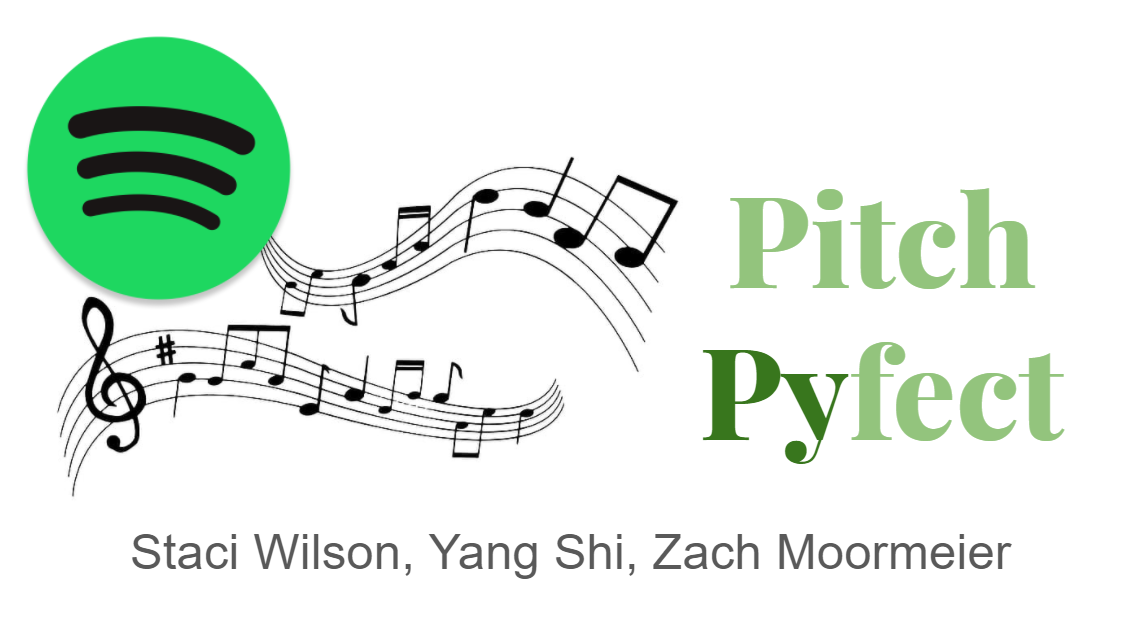

## Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

genres_6_df=pd.read_csv("Input_Data/artists-data.csv")
tracks_1200k_df=pd.read_csv("Input_Data/tracks_features.csv")
tracks_175k_df=pd.read_csv("Input_Data/data.csv")

## 1.0 Music Theory Data Cleanup & Exploration

In [2]:
#get the genres for this study (rock, pop, hip hop)
genres_3_df=genres_6_df.loc[(genres_6_df['Genre']=='Rock')|(genres_6_df['Genre']=='Pop')|
                            (genres_6_df['Genre']=='Hip Hop'),['Artist', 'Genre']].copy()
#remove na values
genres_3_df=genres_3_df.dropna()

#change everything to lower case
genres_3_df = genres_3_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

#output the results
genres_3_df

,Artist,Genre
0,10000 maniacs,rock
1,12 stones,rock
2,311,rock
3,4 non blondes,rock
4,a cruz está vazia,rock
...,...,...
3227,tati quebra barraco,hip hop
3228,valesca popozuda,pop
3229,vine rodry,pop
3234,leandro sapucahy,pop


In [3]:
time_signature_df=tracks_1200k_df[['name',  'artists','time_signature']].copy()
time_signature_df = time_signature_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

#remove the [''] on the artist column 
artists_list=time_signature_df['artists']
artists_lean_list=[artist[2:-2] for artist in artists_list]
time_signature_df['Artist']=artists_lean_list

#add genres to the tracks info
time_signature_df=pd.merge(time_signature_df,genres_3_df, on='Artist',how='outer')

#remove na values
time_signature_df=time_signature_df.dropna()
time_signature_df['genre']=time_signature_df['Genre']
#remove the ducplicates
time_signature_df = time_signature_df.groupby(['name', 'Artist','Genre']).first()

# assign time with its non_numerical value
time_signatures=['others','others','others','3','4','others']
for i in range(0,6):    
    time_signature_df.loc[(time_signature_df['time_signature']==i),'time_signature']=time_signatures[i]

time_signature_df

,,,artists,time_signature,genre
name,Artist,Genre,,,
"""heroes"" - live, glastonbury, 2000",david bowie,rock,['david bowie'],4,rock
"""murder"" he says",tori amos,rock,['tori amos'],4,rock
#9 dream,r.e.m.,rock,['r.e.m.'],4,rock
#singitforjapan - single version,my chemical romance,rock,['my chemical romance'],4,rock
$1000 wedding,gram parsons,rock,['gram parsons'],4,rock
...,...,...,...,...,...
紅蓮,the gazette,rock,['the gazette'],4,rock
絲,the gazette,rock,['the gazette'],4,rock
虚 蜩,the gazette,rock,['the gazette'],4,rock


In [4]:
#shrink the columns of 175k and 1200k data to concat later
tracks_1200k_df=tracks_1200k_df[['name',  'artists',  'explicit', 'key',  'mode', 'acousticness','valence', 'tempo', 'duration_ms','year']]
tracks_175k_df=tracks_175k_df[['name','artists',  'explicit', 'key','mode',  'acousticness', 'valence','tempo', 'duration_ms', 'year']]
#match the data types on ['explicit'] column
tracks_175k_df["explicit"] = tracks_175k_df["explicit"].astype('bool')
tracks_all_df=pd.concat([tracks_1200k_df,tracks_175k_df])
#change all values to lower case
tracks_all_df = tracks_all_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

#remove the [''] on the artist column 
artists_list=tracks_all_df['artists']
artists_lean_list=[artist[2:-2] for artist in artists_list]
tracks_all_df['Artist']=artists_lean_list

#add genres to the tracks info
tracks_df=pd.merge(tracks_all_df,genres_3_df, on='Artist',how='outer')
tracks_df['genre']=tracks_df['Genre']

#remove na values
tracks_df=tracks_df.dropna()

#remove the ducplicates
tracks_df = tracks_df.groupby(['name', 'artists','genre']).first()
tracks_df

,,,explicit,key,mode,acousticness,valence,tempo,duration_ms,year,Artist,Genre
name,artists,genre,,,,,,,,,,
"""40""",['u2'],rock,False,8.0,1.0,0.228000,0.338,150.166,157840.0,1983.0,u2,rock
"""40"" - live",['u2'],rock,False,8.0,1.0,0.099800,0.279,143.079,226200.0,1983.0,u2,rock
"""40"" - remastered 2008",['u2'],rock,False,8.0,1.0,0.185000,0.310,150.316,157667.0,1983.0,u2,rock
"""cassius"" love vs. ""sonny"" wilson - remastered 2001",['the beach boys'],rock,False,10.0,0.0,0.596000,0.487,149.984,211560.0,1964.0,the beach boys,rock
"""heroes"" - live, glastonbury, 2000",['david bowie'],rock,False,7.0,1.0,0.032300,0.607,115.007,357960.0,2018.0,david bowie,rock
...,...,...,...,...,...,...,...,...,...,...,...,...
絲,['the gazette'],rock,False,4.0,0.0,0.021200,0.220,114.994,403293.0,2017.0,the gazette,rock
虚 蜩,['the gazette'],rock,False,11.0,1.0,0.000014,0.336,199.523,227307.0,2018.0,the gazette,rock
裏切る舌,['the gazette'],rock,False,11.0,1.0,0.000002,0.485,154.954,210280.0,2018.0,the gazette,rock


In [5]:
#shrink the dataframe to the columns that will be used in this study
music_theory_df=tracks_df[['Artist','Genre','key','mode', 'valence','tempo','year']].copy()

#change the numeric value into string values
keys_list=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
for i in range (0,12):
    music_theory_df.loc[(music_theory_df.key==i),'key']=keys_list[i]

# assign modes with its non_numerical value
modes=['Minor','Major']
for i in range (0,2):    
    music_theory_df.loc[(music_theory_df['mode']==i),'mode']=modes[i]

# output the dataframe    
music_theory_df 

,,,Artist,Genre,key,mode,valence,tempo,year
name,artists,genre,,,,,,,
"""40""",['u2'],rock,u2,rock,G#,Major,0.338,150.166,1983.0
"""40"" - live",['u2'],rock,u2,rock,G#,Major,0.279,143.079,1983.0
"""40"" - remastered 2008",['u2'],rock,u2,rock,G#,Major,0.310,150.316,1983.0
"""cassius"" love vs. ""sonny"" wilson - remastered 2001",['the beach boys'],rock,the beach boys,rock,A#,Minor,0.487,149.984,1964.0
"""heroes"" - live, glastonbury, 2000",['david bowie'],rock,david bowie,rock,G,Major,0.607,115.007,2018.0
...,...,...,...,...,...,...,...,...,...
絲,['the gazette'],rock,the gazette,rock,E,Minor,0.220,114.994,2017.0
虚 蜩,['the gazette'],rock,the gazette,rock,B,Major,0.336,199.523,2018.0
裏切る舌,['the gazette'],rock,the gazette,rock,B,Major,0.485,154.954,2018.0


## 1.1 Music Theory -- Key Signatures

Songs are composed in key signatures.  The most commonly used key signatures are C, G, D, and A.


In [8]:
#create genre dataframe to be used in the plots later
rock_df=music_theory_df.loc[music_theory_df['Genre'].str.contains('rock'),:].copy()
pop_df=music_theory_df.loc[music_theory_df['Genre'].str.contains('pop'),:].copy()
hiphop_df=music_theory_df.loc[music_theory_df['Genre'].str.contains('hip hop'),:].copy()

<IPython.core.display.Javascript object>


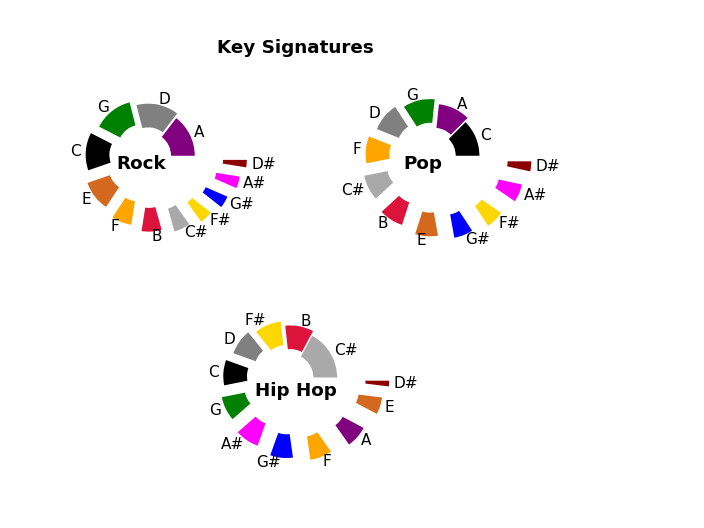

In [9]:
%matplotlib notebook
#set up the dictionary for the music_key values and its color
keys_list=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
key_color_list=['black', 'darkgray','gray','darkred','chocolate','orange','gold', 'green','blue','purple', 'fuchsia', 'crimson']
res = {keys_list[i]: key_color_list[i] for i in range(len(keys_list))}

#donot plot explode value set up
explode=np.arange(0,1.2,0.1)

#calculate the values to put into pie chart
key_rock_count=rock_df['key'].value_counts()
key_pop_count=pop_df['key'].value_counts()
key_hiphop_count=hiphop_df['key'].value_counts()

#set up the color associated with each pie chart widgets
color_rock_list=[res[key_signature] for key_signature in key_rock_count.keys()]
color_pop_list=[res[key_signature] for key_signature in key_pop_count.keys()]
color_hiphop_list=[res[key_signature] for key_signature in key_hiphop_count.keys()]

fig = plt.figure()
#add subplots
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(246)

#add titles
fig.text(0.42, 0.9, 'Key Signatures',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.2, 0.68, 'Rock',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.6, 0.68, 'Pop',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.42, 0.25, 'Hip Hop',horizontalalignment='center', color='black', weight='bold',size='large')

#plot the pie plot for each genres music_key values
ax1.pie(key_rock_count,wedgeprops=dict(width=0.5),explode=explode, labels=key_rock_count.keys(),colors=color_rock_list)
ax2.pie(key_pop_count, wedgeprops=dict(width=0.5),explode=explode,labels=key_pop_count.keys(),colors=color_pop_list)
ax3.pie(key_hiphop_count,wedgeprops=dict(width=0.5),explode=explode, labels=key_hiphop_count.keys(),colors=color_hiphop_list)

plt.show()

## 1.2 Music Theory -- Mode Signatures


<IPython.core.display.Javascript object>


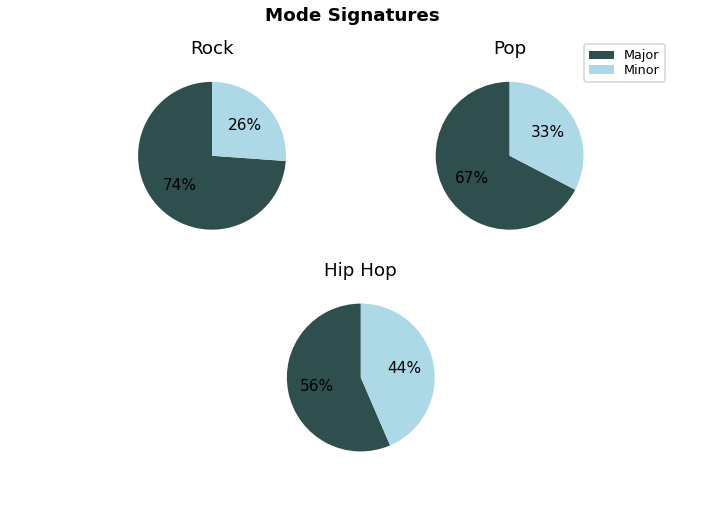

In [10]:
fig = plt.figure()

#set up subplots
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

#titles for subplots
ax1.title.set_text('Rock')
ax2.title.set_text('Pop')
ax3.title.set_text('Hip Hop')

#calculate the data for mode
mode_rock_count=rock_df['mode'].value_counts()
mode_pop_count=pop_df['mode'].value_counts()
mode_hiphop_count=hiphop_df['mode'].value_counts()

#plot the mode into pie plot
ax1.pie(mode_rock_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)
ax2.pie(mode_pop_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)
ax3.pie(mode_hiphop_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)

#legends and titles
fig.text(0.5, 0.96, 'Mode Signatures',horizontalalignment='center', color='black', weight='bold',size='large')
labels = mode_rock_count.keys()
legend = ax2.legend(labels, loc=(0.9, .9),labelspacing=0.1, fontsize='small')
plt.show()

## 1.3 Music Theory -- Valence

<IPython.core.display.Javascript object>


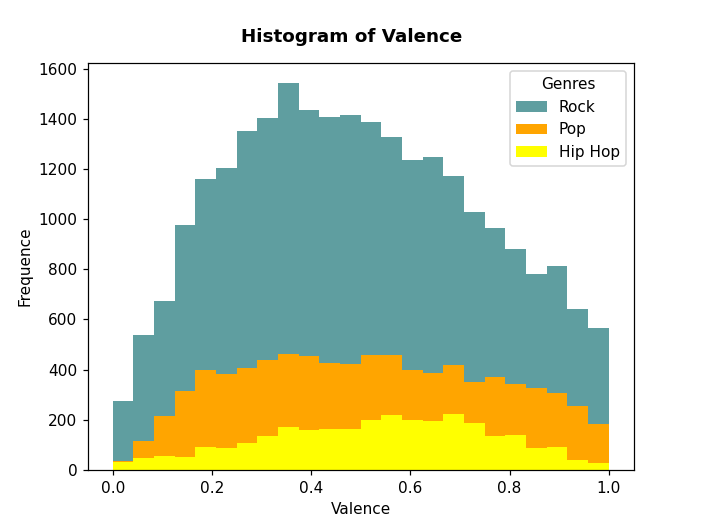

In [11]:
fig = plt.figure()

#define the bin value for histogram
bins = np.linspace(0,1,25)

#plot valence data for three genres
plt.hist(rock_df['valence'], bins, alpha=1,color='cadetblue')
plt.hist(pop_df['valence'], bins, alpha=1,color='orange')
plt.hist(hiphop_df['valence'], bins, alpha=1,color='yellow')

#labels and legends
fig.text(0.5, 0.92, 'Histogram of Valence',horizontalalignment='center', color='black', weight='bold',size='large')
plt.ylabel('Frequence')
plt.xlabel('Valence')
plt.legend(['Rock','Pop','Hip Hop'],
          title="Genres",
          loc="upper right")
plt.show()

<IPython.core.display.Javascript object>


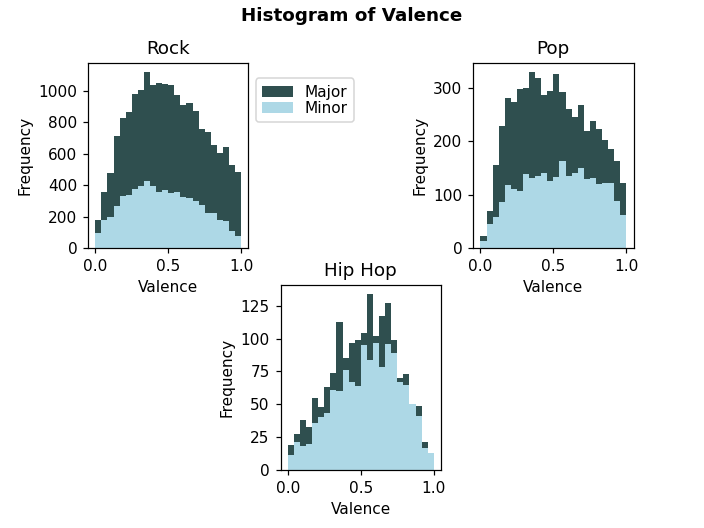

In [12]:
fig = plt.figure()

#set up subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(235)

#titles of the subplots
ax1.title.set_text('Rock')
ax2.title.set_text('Pop')
ax3.title.set_text('Hip Hop')

#set bins for histogram graph
bins = np.linspace(0,1,25)

#caculate the values to be plotted
major_rock =rock_df.loc[rock_df['mode']=='Major',['valence']].copy()
minor_rock =rock_df.loc[rock_df['mode']=='Minor',['valence']].copy()
major_pop =pop_df.loc[pop_df['mode']=='Major',['valence']].copy()
minor_pop =pop_df.loc[pop_df['mode']=='Minor',['valence']].copy()
major_hiphop =hiphop_df.loc[hiphop_df['mode']=='Major',['valence']].copy()
minor_hiphop =hiphop_df.loc[hiphop_df['mode']=='Minor',['valence']].copy()

#plot the valence data
ax1.hist(major_rock['valence'], bins, label='Major',color='darkslategray')
ax1.hist(minor_rock['valence'], bins, label='Minor', color='lightblue')
ax2.hist(major_pop['valence'], bins, label='Major',color='darkslategray')
ax2.hist(minor_pop['valence'], bins, label='Minor', color='lightblue')
ax3.hist(major_hiphop['valence'], bins, label='Major',color='darkslategray')
ax3.hist(minor_hiphop['valence'], bins, label='Minor',color='lightblue')

# add title and legends
fig.text(0.5, 0.96, 'Histogram of Valence',horizontalalignment='center', color='black', weight='bold',size='large')
labels = mode_rock_count.keys()
legend = ax1.legend(labels, bbox_to_anchor=[1, 0.8],loc='center left',labelspacing=0.1)

#add labels to graphs
ax1.set(ylabel='Frequency',xlabel='Valence')
ax2.set(ylabel='Frequency',xlabel='Valence')
ax3.set(ylabel='Frequency',xlabel='Valence')

plt.show()

<IPython.core.display.Javascript object>


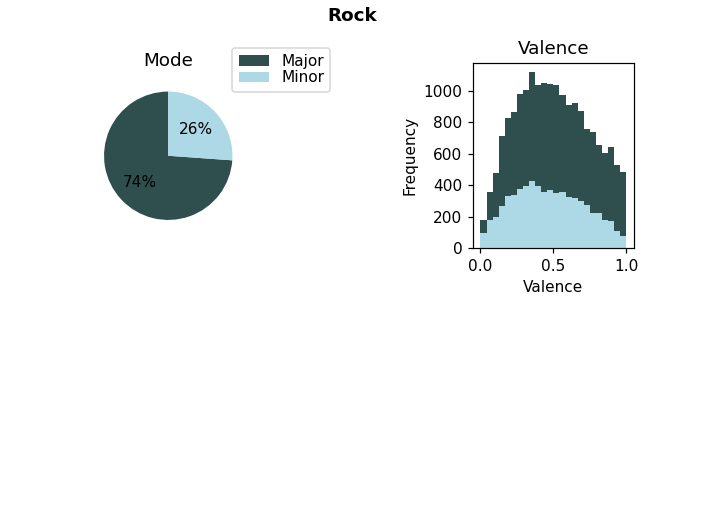

In [13]:
fig = plt.figure()

#set up subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
#titles for subplots
ax1.title.set_text('Mode')
ax2.title.set_text('Valence')

#set bins for histogram graph
bins = np.linspace(0,1,25)

#plot the valence data
ax2.hist(major_rock['valence'], bins, label='Major',color='darkslategray')
ax2.hist(minor_rock['valence'], bins, label='Minor',color='lightblue')
ax2.set(ylabel='Frequency',xlabel='Valence')

#plot the mode into pie plot
ax1.pie(mode_rock_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)

#legends and titles
fig.text(0.5, 0.96, 'Rock',horizontalalignment='center', color='black', weight='bold',size='large')
labels = mode_rock_count.keys()
legend = ax1.legend(labels, loc=(0.9, .9),labelspacing=0.1)

plt.show()

<IPython.core.display.Javascript object>


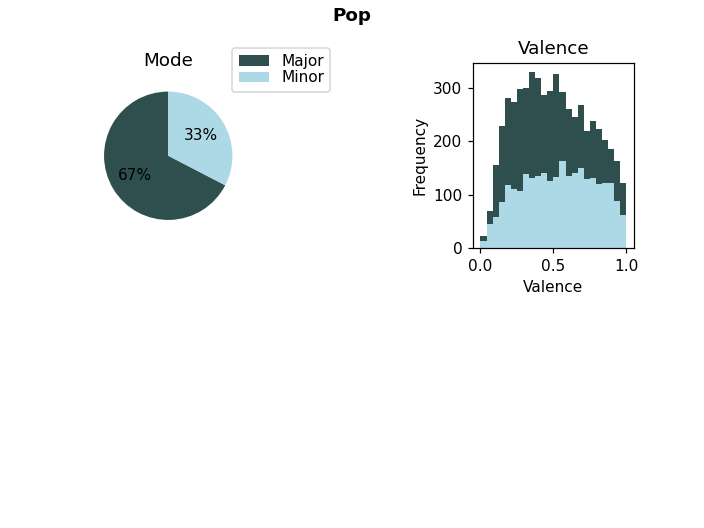

In [14]:
fig = plt.figure()

#set up subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
#titles for subplots
ax1.title.set_text('Mode')
ax2.title.set_text('Valence')

#set bins for histogram graph
bins = np.linspace(0,1,25)

#plot the valence data
ax2.hist(major_pop['valence'], bins, label='Major',color='darkslategray')
ax2.hist(minor_pop['valence'], bins, label='Minor',color='lightblue')
ax2.set(ylabel='Frequency',xlabel='Valence')

#plot the mode into pie plot
ax1.pie(mode_pop_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)

#legends and titles
fig.text(0.5, 0.96, 'Pop',horizontalalignment='center', color='black', weight='bold',size='large')
labels = mode_pop_count.keys()
legend = ax1.legend(labels, loc=(0.9, .9),labelspacing=0.1)

plt.show()

<IPython.core.display.Javascript object>


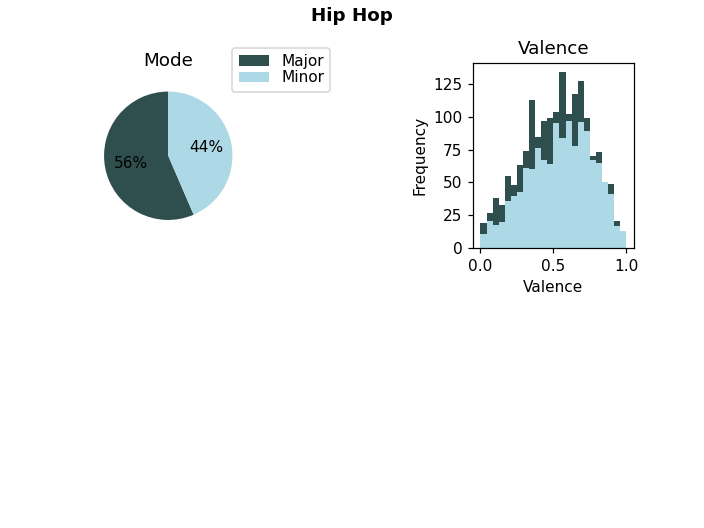

In [15]:
fig = plt.figure()

#set up subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
#titles for subplots
ax1.title.set_text('Mode')
ax2.title.set_text('Valence')

#set bins for histogram graph
bins = np.linspace(0,1,25)

#plot the valence data
ax2.hist(major_hiphop['valence'], bins, label='Major',color='darkslategray')
ax2.hist(minor_hiphop['valence'], bins, label='Minor',color='lightblue')
ax2.set(ylabel='Frequency',xlabel='Valence')

#plot the mode into pie plot
ax1.pie(mode_hiphop_count, autopct='%1.0f%%',colors=['darkslategray','lightblue'], startangle=90)

#legends and titles
fig.text(0.5, 0.96, 'Hip Hop',horizontalalignment='center', color='black', weight='bold',size='large')
labels = mode_hiphop_count.keys()
legend = ax1.legend(labels, loc=(0.9, .9),labelspacing=0.1)

plt.show()

## 1.4 Music Theory -- Tempo 

Most songs on spotify have a tempo that falls between 75 and 150 beats per minute.


<IPython.core.display.Javascript object>


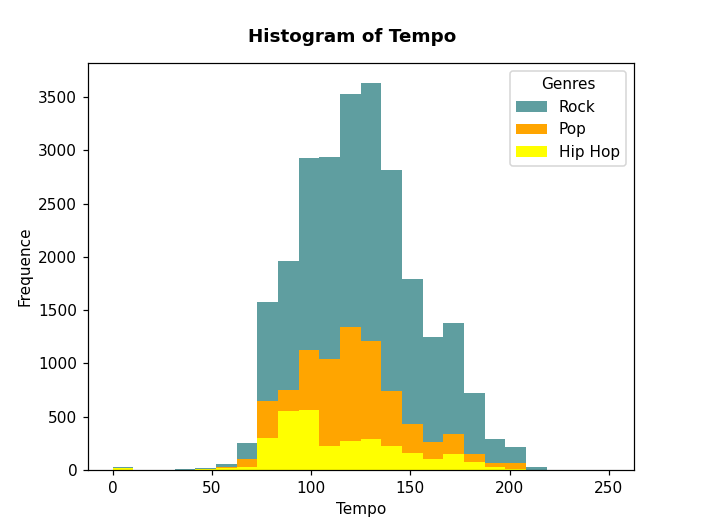

In [14]:
fig = plt.figure()

#define bins for histogram
bins = np.linspace(0,250,25)

#plot the tempo data
plt.hist(rock_df['tempo'], bins, alpha=1,color='cadetblue')
plt.hist(pop_df['tempo'], bins, alpha=1,color='orange')
plt.hist(hiphop_df['tempo'], bins, alpha=1,color='yellow')

#add legends and labels
fig.text(0.5, 0.92, 'Histogram of Tempo',horizontalalignment='center', color='black', weight='bold',size='large')
plt.ylabel('Frequence')
plt.xlabel('Tempo')
plt.legend(['Rock','Pop','Hip Hop'],
          title="Genres",
          loc="upper right")
plt.show()

## 1.5 Music Theory -- Time Signature

In [19]:
#create genre dataframe to be used in the plots later
rock_time_df=time_signature_df.loc[time_signature_df['genre'].str.contains('rock'),:].copy()
pop_time_df=time_signature_df.loc[time_signature_df['genre'].str.contains('pop'),:].copy()
hiphop_time_df=time_signature_df.loc[time_signature_df['genre'].str.contains('hip hop'),:].copy()

<IPython.core.display.Javascript object>


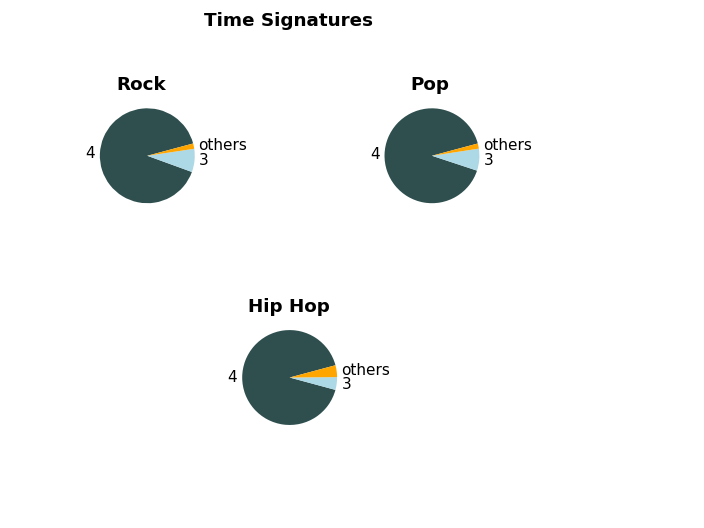

In [23]:
#set up the dictionary for the music_key values and its color
%matplotlib notebook
time_signature_list=['others',"3","4"]
time_color_list=['orange','lightblue', 'darkslategray']
res = {time_signature_list[i]: time_color_list[i] for i in range(len(time_signature_list))}

#calculate the values to put into pie chart
time_rock_count=rock_time_df['time_signature'].value_counts()
time_pop_count=pop_time_df['time_signature'].value_counts()
time_hiphop_count=hiphop_time_df['time_signature'].value_counts()
#set up the color associated with each pie chart widgets
color_rock_list=[res[time_signature] for time_signature in time_rock_count.keys()]
color_pop_list=[res[time_signature] for time_signature in time_pop_count.keys()]
color_hiphop_list=[res[time_signature] for time_signature in time_hiphop_count.keys()]

fig = plt.figure()
#add subplots
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(246)

#add titles
fig.text(0.41, 0.95, 'Time Signatures',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.2, 0.83, 'Rock',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.61, 0.83, 'Pop',horizontalalignment='center', color='black', weight='bold',size='large')
fig.text(0.41, 0.41, 'Hip Hop',horizontalalignment='center', color='black', weight='bold',size='large')

#plot the pie plot for each genres music_key values
ax1.pie(time_rock_count,startangle=15,labels=time_rock_count.keys(),colors=color_rock_list)
ax2.pie(time_pop_count, startangle=15,labels=time_pop_count.keys(),colors=color_pop_list)
ax3.pie(time_hiphop_count,startangle=15, labels=time_hiphop_count.keys(),colors=color_hiphop_list)

plt.show()

## 2. Music Theory -- History

<IPython.core.display.Javascript object>


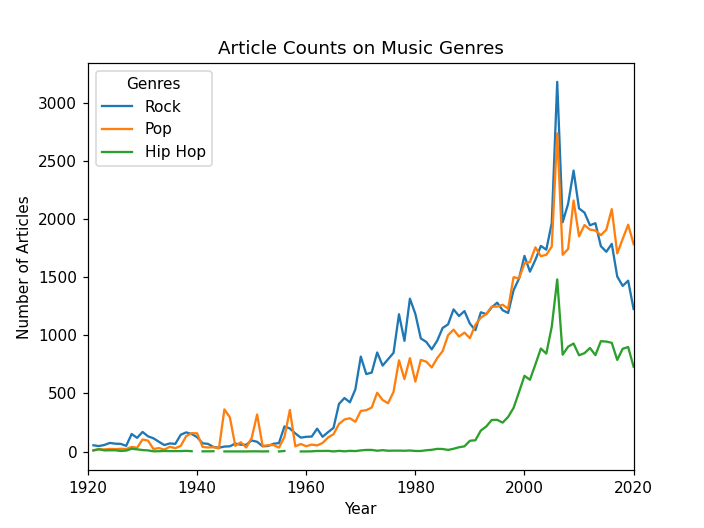

In [17]:
fig = plt.figure()
nyt_article_df=pd.read_csv("Output_Data/nyt_genre.csv")

#plot the article counts by genre
plt.plot(nyt_article_df['Year'],nyt_article_df['Rock'])
plt.plot(nyt_article_df['Year'],nyt_article_df['Pop'])
plt.plot(nyt_article_df['Year'],nyt_article_df['Hip Hop'])
#title and legend
plt.title("Article Counts on Music Genres")
plt.ylabel('Number of Articles')
plt.xlabel('Year')
plt.legend(['Rock','Pop','Hip Hop'],
          title="Genres",
          loc="upper left")

#set the limit on x axis
plt.xlim(1920,2020)
plt.show()

<IPython.core.display.Javascript object>


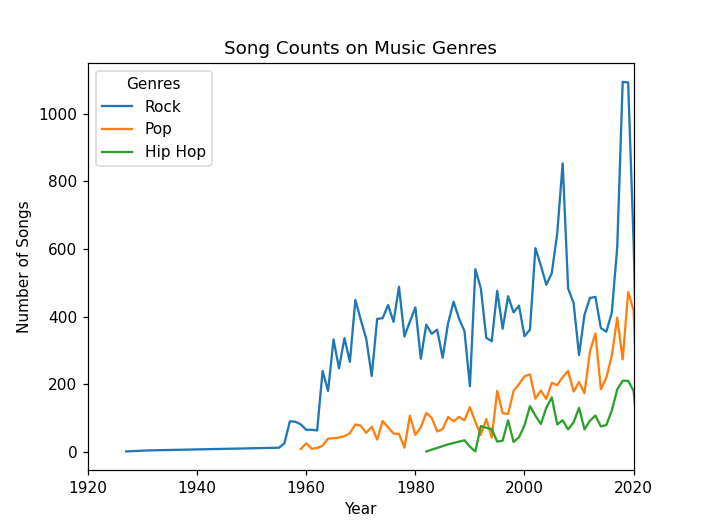

In [18]:
fig = plt.figure()
#group the data by year
grouped_rock_df=rock_df.groupby(['year'])
grouped_rock_count=grouped_rock_df['key'].count()
grouped_pop_df=pop_df.groupby(['year'])
grouped_pop_count=grouped_pop_df['key'].count()
grouped_hiphop_df=hiphop_df.groupby(['year'])
grouped_hiphop_count=grouped_hiphop_df['key'].count()

#plot the song counts by genre
plt.plot(grouped_rock_count)
plt.plot(grouped_pop_count)
plt.plot(grouped_hiphop_count)

#title and legend
plt.title("Song Counts on Music Genres")
plt.ylabel('Number of Songs')
plt.xlabel('Year')
plt.legend(['Rock','Pop','Hip Hop'],
          title="Genres",
          loc="upper left")

#set the limit on x axis
plt.xlim(1920,2020)
plt.show()

## 3. Charactristic Words

In [19]:
#input data from lyrics output
rock_word_df=pd.read_csv("Output_Data/rock_word_count.csv")
hiphop_word_df=pd.read_csv("Output_Data/hiphop_word_count.csv")
pop_word_df=pd.read_csv("Output_Data/pop_word_count.csv")

#set each index to the actual word
rock_word_df=rock_word_df.set_index('words')
pop_word_df=pop_word_df.set_index('words')
hiphop_word_df=hiphop_word_df.set_index('words')

#make up a list of none_charactristic words
none_characteristics_list=['.',',','the','that','you','your','to','and','a',
                           'i',"i'm",'me','my','in','on','it','of','all','is',
                           'for','be','we',"don't", 'so',"it's",'but',"?",'this',
                          'no','just','with','what','oh','you','do','out','are',
                          'if','will',"you're", 'not','was','when','now',
                          'up','down','they','!']

In [20]:
#remove none_charactristic words from rock word list and output the top 10 
rock_charactristics_df=rock_word_df.drop(none_characteristics_list)
rock_charactristics_df.head(10)

,0
words,
love,30229
know,29518
like,25514
can,23897
time,20193
got,19733
one,19249
go,19143
never,18948


In [21]:
#remove none_charactristic words from pop word list and output the top 10 
pop_charactristics_df=pop_word_df.drop(none_characteristics_list)
pop_charactristics_df.head(10)

,0
words,
love,28349
know,24199
like,21917
can,17081
get,15888
got,15531
baby,14872
go,14712
yeah,12209


In [23]:
#remove none_charactristic words from hip hop word list and output the top 10 
hiphop_charactristics_df=hiphop_word_df.drop(none_characteristics_list)
hiphop_charactristics_df.head(10)

,0
words,
like,30838
get,22995
know,22076
got,21678
can,14015
ain't,13645
go,12892
love,12540
she,12406
